In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/mushrooms.csv')

## Data Exploration

In [6]:
df.shape

(8124, 23)

So the **Data** contains *23 columns* and *8124 rows*.

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [33]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64



1.   There is no null value in the dataset.
2.   It seems all the columns are composed of categorical values. We shall look for the unique values in each columns and their distribution.



In [11]:
for i in df.columns:
  print(i.upper())
  print('Number of unique categories : ',len(df[i].unique()))
  print(df[i].value_counts())
  print('-------------------------------')
  print()

CLASS
Number of unique categories :  2
e    4208
p    3916
Name: class, dtype: int64
-------------------------------

CAP-SHAPE
Number of unique categories :  6
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
-------------------------------

CAP-SURFACE
Number of unique categories :  4
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
-------------------------------

CAP-COLOR
Number of unique categories :  10
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
-------------------------------

BRUISES
Number of unique categories :  2
f    4748
t    3376
Name: bruises, dtype: int64
-------------------------------

ODOR
Number of unique categories :  9
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
-------------------------------

GILL-ATTACHMENT
Number of unique categories :  2
f 

In [12]:
import plotly.express as px

In [31]:
for i in df.columns:
  fig=px.bar(df[i].value_counts(),color=df[i].value_counts())
  fig.update_layout(xaxis_title=i.title(),yaxis_title='Counts',title=i.upper()+" DISTRIBUTION",title_x=0.5)
  fig.show()
  print()

# Feature Engineering

Dividing the dataset into features and target.

In [118]:
X = df.iloc[:,1:]               # independent variable
y = df.iloc[:,0]                # dependent variable

In [119]:
y.shape

(8124,)

In [120]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


As all our variables are categorical we shall encode them into numbers for further steps.

In [121]:
X = pd.get_dummies(X,drop_first=True,prefix=X.columns)

In [122]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [123]:
y = pd.get_dummies(y,drop_first=True)

In [125]:
y=y.iloc[:,0]

In [126]:
y.shape

(8124,)

## Data split

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

# Machine Learning

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [165]:
model_pipeline = list()
model_pipeline.append(LogisticRegression())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())

In [166]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report,confusion_matrix
model_list = ['Logistic Regression','SVM','KNN','Naive Bayes']
accuracy_list = list()
auroc_list = list()
matrix_list = list()
for model in model_pipeline:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy_list.append(accuracy_score(y_test,y_pred))
  auroc_list.append(roc_auc_score(y_test,y_pred))
  matrix_list.append(confusion_matrix(y_test,y_pred))

# Model Evaluation

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

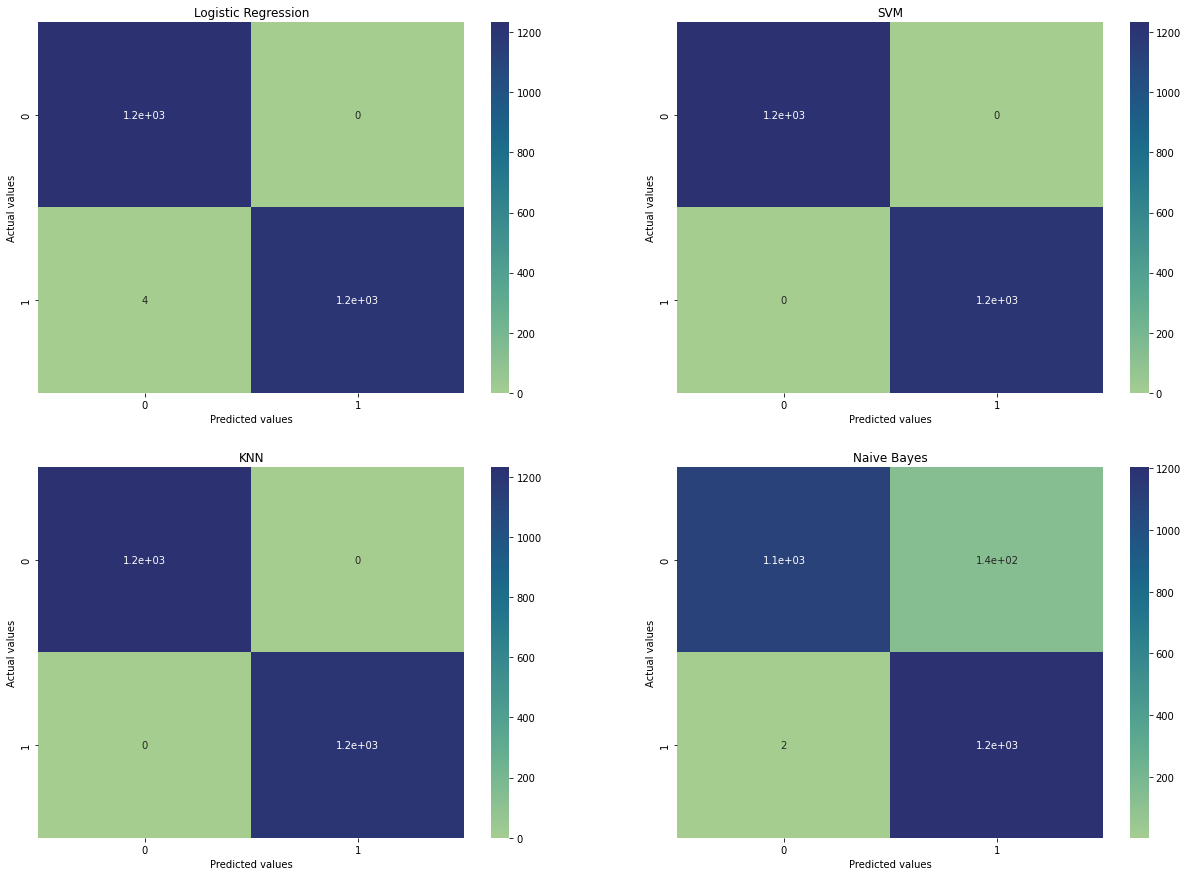

In [171]:
fig = plt.figure(figsize=(21,15))
for i in range(len(matrix_list)):
  matrix = matrix_list[i]
  model = model_list[i]
  sub = fig.add_subplot(2,2,i+1).set_title(model)
  matrix_plot = sns.heatmap(matrix,annot=True,cmap='crest')
  matrix_plot.set_xlabel('Predicted values')
  matrix_plot.set_ylabel('Actual values')


In [172]:
score = pd.DataFrame({"Model_Name":model_list,"Accuracy":accuracy_list,"AUROC":auroc_list})
score

,Model_Name,Accuracy,AUROC
0,Logistic Regression,0.998359,0.998342
1,SVM,1.000000,1.000000
2,KNN,1.000000,1.000000
3,Naive Bayes,0.942576,0.943164



**Model Selection**
1.   From the above evaluation it is clear **SVM** and **KNN** are able to perform with highest accuracy of *1*.
2.   By the fact that **KNN** performs well with the dataset where number rows is higher than number of columns, we are choosing KNN as our final model.



## KNN

In [173]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [178]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print()
print("AUROC :",roc_auc_score(y_test,y_pred))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("-------------------------------------------------------")

Accuracy : 1.0

AUROC : 1.0

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00      1206

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

-------------------------------------------------------


## Save the final model

In [179]:
import pickle
model = pickle.dump(model,open("model.pkl","wb"))